In [1]:
pip install pyforest

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pyforest import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
df = pd.read_csv('Student_Performance.csv')

<IPython.core.display.Javascript object>

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


In [6]:
"""le = LabelEncoder()
old_df = {}
for i in df.columns:   
    old_df[i] = le.fit_transform(df[i])
    
new_df = pd.DataFrame(old_df)
new_df
"""

df['Extracurricular Activities'] = pd.get_dummies(df['Extracurricular Activities'], drop_first = True)


<IPython.core.display.Javascript object>

In [7]:
df = df.rename(columns = {'Hours Studied' : 'Hours_studied',
                          'Previous Scores' : 'Previous_Score', 'Sleep Hours' : 'Sleep_Hours',
                          'Sample Question Papers Practiced' : 'Practiced_Questions',
                          'Performance Index' : 'Performance_index', 'Extracurricular Activities' : 'Extracurricular_activities'})

df.head()

,Hours_studied,Previous_Score,Extracurricular_activities,Sleep_Hours,Practiced_Questions,Performance_index
0,7,99,True,9,1,91.0
1,4,82,False,4,2,65.0
2,8,51,True,7,2,45.0
3,5,52,True,5,2,36.0
4,7,75,False,8,5,66.0


<IPython.core.display.Javascript object>

<Axes: >

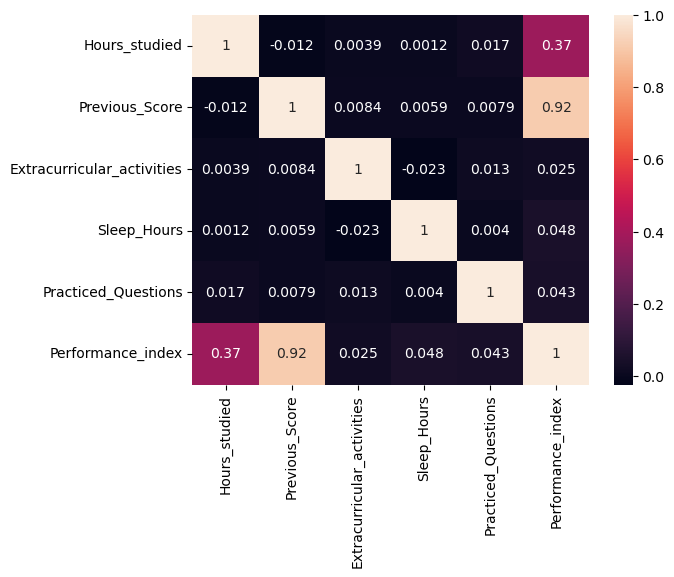

In [8]:
sns.heatmap(df.corr(), annot= True)

In [9]:
y = df['Performance_index']
x = df.drop('Performance_index', axis = 1)

scaler = StandardScaler()

X = scaler.fit_transform(x)
X


array([[ 0.77518771,  1.70417565,  1.01045465,  1.45620461, -1.24975394],
       [-0.38348058,  0.72391268, -0.98965352, -1.49229423, -0.90098215],
       [ 1.16141048, -1.06362569,  1.01045465,  0.27680507, -0.90098215],
       ...,
       [ 0.38896495,  0.7815752 ,  1.01045465,  0.86650484,  0.1453332 ],
       [ 1.54763324,  1.5888506 ,  1.01045465,  0.27680507, -1.59852572],
       [ 0.77518771,  0.26261245, -0.98965352,  0.86650484, -1.24975394]])

In [10]:
formula_str = y.name +' ~ '+' + '.join(x.columns)
formula_str

'Performance_index ~ Hours_studied + Previous_Score + Extracurricular_activities + Sleep_Hours + Practiced_Questions'

In [11]:
import statsmodels.formula.api as sm

In [12]:
p_valmodel=sm.ols(formula=formula_str, data=df)
p_fitted = p_valmodel.fit()
print(p_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance_index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Tue, 02 Sep 2025   Prob (F-statistic):               0.00
Time:                        13:51:38   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [13]:
X_train, X_test, y_train, y_test =  train_test_split(x, y, test_size = 0.2, random_state = 43)

In [14]:
y_train_pred = p_fitted.predict(X_train)
y_test_pred = p_fitted.predict(X_test)

In [15]:
print(metrics.root_mean_squared_error(y_train_pred, y_train))
print(metrics.root_mean_squared_error(y_test_pred, y_test))

<IPython.core.display.Javascript object>

2.0397347976641473


<IPython.core.display.Javascript object>

2.0284676459145663


In [16]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [17]:
train_pred = lm.predict(X_train)

In [18]:
test_pred = lm.predict(X_test)

In [19]:
print(metrics.root_mean_squared_error(train_pred, y_train))
print(metrics.root_mean_squared_error(test_pred, y_test))

<IPython.core.display.Javascript object>

2.0395090804684144


<IPython.core.display.Javascript object>

2.0305065113731784


In [20]:
print(f'Error percentage : {metrics.root_mean_squared_error(test_pred, y_test)/y.std()}')

<IPython.core.display.Javascript object>

Error percentage : 0.10568642304513447


BUILDING A PIPELINE
